In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df= pd.read_csv('placement.csv')
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [3]:
# Split the data into indepenedent and dependent variable
x= df.iloc[:, 0:-1]
y= df.iloc[:, -1]

In [4]:
x.head()

,cgpa,resume_score
0,8.14,6.52
1,6.17,5.17
2,8.27,8.86
3,6.88,7.27
4,7.52,7.30


In [5]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: placed, dtype: int64

In [6]:
# Building Perceptron model

from sklearn.linear_model import Perceptron
perceptron= Perceptron()
perceptron.fit(x,y)

Perceptron()

In [7]:
perceptron.intercept_

array([-25.])

In [8]:
perceptron.coef_

array([[ 40.26, -36.  ]])

In [9]:
from mlxtend.plotting import plot_decision_regions

C:\Users\DELL 2\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<AxesSubplot:>

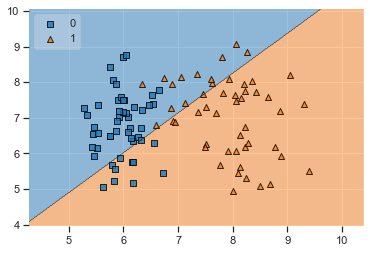

In [10]:
plot_decision_regions(x.values, y.values, clf= perceptron, legend=2)

# MNIST Dataset with Perceptron Model

In [11]:
from sklearn.datasets import load_digits

In [12]:
digits= load_digits()

In [13]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [14]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x= digits.data
y= digits.target

In [17]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=101)

In [18]:
from sklearn.linear_model import Perceptron
perc= Perceptron()
perc.fit(x_train, y_train)

Perceptron()

In [19]:
y_pred_train= perc.predict(x_train)
y_pred_test= perc.predict(x_test)

In [20]:
# Evaluation matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [21]:
confusion_matrix(y_test, y_pred_test)

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  1,  0,  4,  0,  1,  2,  0],
       [ 0,  0, 30,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 28,  0,  2,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 42,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 41,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  1, 26,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  1,  0,  2,  0,  1,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  1,  3,  0,  0,  0, 29]], dtype=int64)

In [23]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       0.97      0.81      0.88        42
           2       1.00      0.97      0.98        31
           3       0.90      0.90      0.90        31
           4       0.98      0.95      0.97        44
           5       0.77      1.00      0.87        41
           6       1.00      0.93      0.96        28
           7       0.95      1.00      0.98        40
           8       0.89      0.89      0.89        36
           9       1.00      0.88      0.94        33

    accuracy                           0.93       360
   macro avg       0.94      0.93      0.94       360
weighted avg       0.94      0.93      0.93       360



In [24]:
print('Training acc', accuracy_score(y_train, y_pred_train))
print('......................')
print('Test acc', accuracy_score(y_test, y_pred_test))

Training acc 0.9659011830201809
......................
Test acc 0.9333333333333333
